# Numerical Integral

## Question 1
Evaluate $$\int_0^\infty \dfrac{1}{1+25x^2} dx$$

In fact, it can be calculate by hand that the integral equals to $\dfrac{\pi}{10}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

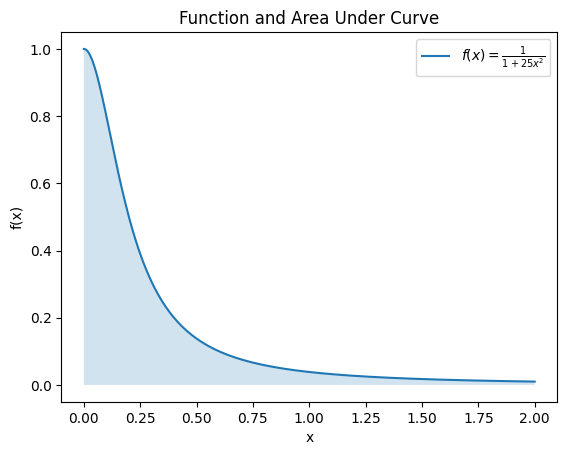

In [2]:
# Define the function
f = lambda x: 1/(1+25*x**2)

# Plot
x = np.linspace(0, 2, 500)
y = f(x)
plt.plot(x, y, label=r'$f(x) = \frac{1}{1+25x^2}$')
plt.fill_between(x, y, alpha=0.2)
plt.title('Function and Area Under Curve')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [ ]:
# Method 1: Using sympy package
import sympy as sp
x = sp.symbols('x')
integral_sympy = sp.integrate(1/(1+25*x**2), (x, 0, sp.oo))
ans = float(integral_sympy)
print(f"Integral using sympy: {ans}. Exact value: {np.pi/10}")
print(f"Error = {np.pi/10 - ans}")
if abs(np.pi/10 - ans) < 1e-10:
    print("The result is accurate to at least 10 decimal places.")
print('-------------------------------------------------------')


# Method 2: Using scipy.integrate.quad
import scipy.integrate as integrate
result, error = integrate.quad(f, 0, float('inf'), epsabs=1e-10)
print(f"Integral using scipy.integrate.quad: {result}. Exact value: {np.pi/10}")
print(f"Error = {np.pi/10 - result}")

if abs(np.pi/10 - result) < 1e-10:
    print("The result is accurate to at least 10 decimal places.")
print('-------------------------------------------------------')

# Method 3: Using np.trapz (Composite trapezoidal rule)

f = lambda x: 1 / (1 + 25*x**2)
x_vals = np.linspace(0, 10**5, 10**7)  # 上限取夠大近似無窮
y_vals = f(x_vals)
approx = np.trapz(y_vals, x_vals)
print(f"Integral using np.trapz: {approx}. Exact value: {np.pi/10}")
print(f"Error = {np.pi/10 - approx}")
if abs(np.pi/10 - approx) < 1e-10:
    print("The result is accurate to at least 10 decimal places.")
print('-------------------------------------------------------')

# Method 4: Using Monte Carlo
N = 10**8
a, b = 0, 5
estimates = []
for i in range(10):
    X = np.random.uniform(a, b, N)
    Y = 1 / (1 + 25*X**2)
    estimate = (b - a) * np.mean(Y)
    estimates.append(estimate)
estimate_result = np.mean(estimates)
print(f"Integral using Monte Carlo: {estimate_result}. Exact value: {np.pi/10}")
print(f"Error = {np.pi/10 - estimate_result}")
if abs(np.pi/10 - estimate_result) < 1e-10:
    print("The result is accurate to at least 10 decimal places.")
print('-------------------------------------------------------')


Integral using sympy: 0.3141592653589793. Exact value: 0.3141592653589793
Error = 0.0
The result is accurate to at least 10 decimal places.
-------------------------------------------------------
Integral using scipy.integrate.quad: 0.3141592653589789. Exact value: 0.3141592653589793
Error = 3.885780586188048e-16
The result is accurate to at least 10 decimal places.
-------------------------------------------------------
Integral using np.trapz: 0.3141588653589788. Exact value: 0.3141592653589793
Error = 4.0000000051110263e-07
-------------------------------------------------------


/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_3694/2662202788.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  approx = np.trapz(y_vals, x_vals)


Integral using Monte Carlo: [np.float64(0.3061861306182174), np.float64(0.30611732332949315), np.float64(0.3062114782022143), np.float64(0.3062481752776589), np.float64(0.3060266976997216), np.float64(0.30622655922517056), np.float64(0.30622678766729633), np.float64(0.3062692631767094), np.float64(0.3061164364431619), np.float64(0.30606963813962784)]. Exact value: 0.3141592653589793
Error = 0.007989416381052161
-------------------------------------------------------


### Comment
Since this integral has a closed form solution, no matter what method we use, the results can be quite approximated to real solution.

## Question 2
Evaluate $$\int_0^1 \dfrac{\ln(x)}{1+25x^2} dx$$

For this time, there does not exist closed form of solution.

/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_3534/2389104627.py:2: RuntimeWarning: divide by zero encountered in log
  f = lambda x: np.log(x)/(1+25*x**2)


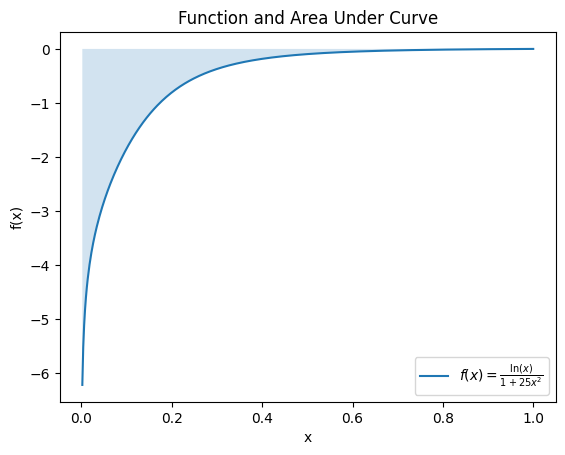

In [9]:
# Define the function
f = lambda x: np.log(x)/(1+25*x**2)

# Plot
x = np.linspace(0, 1, 500)
y = f(x)
plt.plot(x, y, label=r'$f(x) = \frac{\ln(x)}{1+25x^2}$')
plt.fill_between(x, y, alpha=0.2)
plt.title('Function and Area Under Curve')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [6]:
import mpmath as mp
mp.mp.dps = 50  # 高精度做參考真值與誤差

# 參考真值（高精度）：直接在 x∈(0,1) 上積分，mpmath 會處理 ln 的端點奇異
f_x = lambda x: mp.log(x) / (1 + 25*x**2)
I_ref = mp.quad(f_x, [0, 1])   # 拆區間以處理端點
print("Reference (mpmath, 50 dps) =", I_ref)

Reference (mpmath, 50 dps) = -0.54544456341979804172342105032300319625862993402633


In [15]:
# Method 1: Using sympy package (No closed form, cannot use)
# import sympy as sp
# x = sp.symbols('x')
# integral_sympy = sp.integrate(sp.log(x)/(1+25*x**2), (x, 0, 1))
# ans = float(integral_sympy)
# print(f"Integral using sympy: {ans}. Exact value: {np.pi/10}")
# print(f"Error = {np.pi/10 - ans}")
# if abs(np.pi/10 - ans) < 1e-10:
#     print("The result is accurate to at least 10 decimal places.")
# print('-------------------------------------------------------')


# Method 2: Using scipy.integrate.quad
import scipy.integrate as integrate
result, error = integrate.quad(f, 0, float('inf'), epsabs=1e-10)
print(f"Integral using scipy.integrate.quad: {result}.")
print(f"Error = {(float(I_ref - result)):.10f}")


if abs(I_ref - result) < 1e-10:
    print("The result is accurate to at least 10 decimal places.")
print('-------------------------------------------------------')

# Method 3: Using np.trapz (Composite trapezoidal rule)

x_vals = np.linspace(0, 1, 10**5)  # 上限取夠大近似無窮
y_vals = f(x_vals)
approx = np.trapz(y_vals, x_vals)
print(f"Integral using np.trapz: {approx}.")
print(f"Error = {(float(I_ref - approx)):.10f}")
if abs(I_ref - approx) < 1e-10:
    print("The result is accurate to at least 10 decimal places.")
print('-------------------------------------------------------')

# Method 4: Using Monte Carlo
N = 10**7
a, b = 0, 1
X = np.random.uniform(a, b, N)
Y = np.log(X) / (1 + 25*X**2)
estimate = (b - a) * np.mean(Y)
print(f"Integral using Monte Carlo: {estimate}.")
print(f"Error = {(float(I_ref - estimate)):.10f}")
if abs(I_ref - approx) < 1e-10:
    print("The result is accurate to at least 10 decimal places.")
print('-------------------------------------------------------')


Integral using scipy.integrate.quad: 0.3141592653589789.
Error = -0.8596038288
-------------------------------------------------------
Integral using np.trapz: 0.27468015338838675.
Error = -0.8201247168
-------------------------------------------------------
Integral using Monte Carlo: -0.5452070042266095.
Error = -0.0002375592
-------------------------------------------------------


/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_3694/1600861830.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  approx = np.trapz(y_vals, x_vals)


### Comment
If we try to integrate directly, the results seems to be not so good. 

### Transform 1
Now we consider split the integral interval to two parts:

$$\int_0^1 \dfrac{\ln(x)}{1+25x^2} dx=\underbrace{\int_0^\varepsilon \dfrac{\ln(x)}{1+25x^2} dx}_{I_1}+\underbrace{\int_\varepsilon^1 \dfrac{\ln(x)}{1+25x^2} dx}_{I_2}$$

which $\varepsilon$ choose to be $10^{-8}$



In [44]:
# ---- params & imports ----
import numpy as np
import mpmath as mp
mp.mp.dps = 50  # 高精度
EPS = 1e-8      
fmt = lambda x: f"{x:.10f}"

# 參考真值（高精度，直接在 [0,1] 上積分，拆區處理端點）
f_mp = lambda x: mp.log(x)/(1+25*x**2)
I_ref = mp.quad(f_mp, [0, 1])
print(f"[Reference mpmath 50dps]  I = {I_ref}\n")

# ---- Method 1: Sympy numeric on two subintervals ----
x = sp.symbols('x', positive=True)
expr = sp.log(x)/(1+25*x**2)
# 轉成 mpmath 函數，確保真的做數值
f_mp = sp.lambdify(x, expr, 'mpmath')

I1_sym = mp.quad(f_mp, [0, EPS])
I2_sym = mp.quad(f_mp, [EPS, 1])
I_sym = I1_sym + I2_sym

abs_err = abs(I_sym - I_ref)
print("[Method 1: sympy numeric split]")
print("Value  =", I_sym)
print("AbsErr =", abs_err)
print('-------------------------------------------------------')

# ---- Method 2: SciPy quad on two subintervals ----
try:
    from scipy.integrate import quad

    f_np = lambda x: np.log(x)/(1+25*x**2)

    I1_quad, e1 = quad(f_np, 0.0, EPS, epsabs=1e-12, epsrel=1e-12, limit=200)
    I2_quad, e2 = quad(f_np, EPS, 1.0, epsabs=1e-12, epsrel=1e-12, limit=200)

    I_quad = I1_quad + I2_quad
    abs_err = abs(I_quad - float(I_ref))
    print("[Method 2: scipy.integrate.quad split]")
    # print("I =", I_quad, "   quad est.err parts ~", e1, "+", e2)
    print("AbsErr =", abs_err)
except Exception as e:
    print("[Method 2: quad] skipped due to:", e, "\n")
print('-------------------------------------------------------')

# ---- Method 3: Composite trapezoid (np.trapz) ----
def trapz_split(EPS, N1=200_000, N2=200_000):
    # I2 on [EPS,1]
    x2 = np.linspace(EPS, 1.0, N2, dtype=float)
    y2 = np.log(x2)/(1+25*x2**2)
    I2 = np.trapz(y2, x2)

    # I1 on [0,EPS]  x = EPS*t
    t_min = 1e-12
    t1 = np.linspace(t_min, 1.0, N1, dtype=float) # 確保 不會有 0 輸入函數裡
    x1 = EPS * t1
    y1 = np.log(x1)/(1+25*x1**2)
    I1 = np.trapz(y1, x1)  

    return I1 + I2

I_trapz = trapz_split(EPS)
abs_err = abs(I_trapz - float(I_ref))
print("[Method 3: np.trapz split]")
print("I =", I_trapz, "   (N1=N2=200000)")
print("AbsErr =", abs_err)
print('-------------------------------------------------------')

# ---- Method 4: Monte Carlo (split) ----
rng = np.random.default_rng(114514)

def mc_split(EPS, M1=2000000, M2=2000000):
    # I2: X ~ Uniform(EPS,1)
    X2 = rng.random(M2)*(1.0 - EPS) + EPS
    Y2 = np.log(X2)/(1+25*X2**2)
    I2 = (1.0 - EPS) * np.mean(Y2)

    # I1: X ~ Uniform(0,EPS). 避免產生 0：夾到極小正數
    T = rng.random(M1)                  # in [0,1)
    T = np.clip(T, 1e-300, 1.0)         # 避免 log(0)
    X1 = EPS * T
    Y1 = np.log(X1)/(1+25*X1**2)
    I1 = EPS * np.mean(Y1)

    return I1 + I2

I_mc = mc_split(EPS)
abs_err = abs(I_mc - float(I_ref))
print("[Method 4: Monte Carlo split (uniform)]")
print("I =", I_mc, "   (M1=M2=2e6)")
print("AbsErr =", abs_err)
print('-------------------------------------------------------')



[Reference mpmath 50dps]  I = -0.54544456341979804172342105032300319625862993402633

[Method 1: sympy numeric split]
Value  = -0.54544456341979804172342105032300319625862993402633
AbsErr = 0.0
-------------------------------------------------------
[Method 2: scipy.integrate.quad split]
AbsErr = 0.0
-------------------------------------------------------
[Method 3: np.trapz split]
I = -0.5454555717051204    (N1=N2=200000)
AbsErr = 1.100828532230036e-05
-------------------------------------------------------
[Method 4: Monte Carlo split (uniform)]
I = -0.5455449672201097    (M1=M2=2e6)
AbsErr = 0.00010040380031162144
-------------------------------------------------------


/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_3694/1711812324.py:52: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  I2 = np.trapz(y2, x2)
/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_3694/1711812324.py:59: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  I1 = np.trapz(y1, x1)


### Transform 2
Here consider to transform the integral interval to $[0, \infty]$ by substituing $x=e^{-u}$, then 

$$\int_0^1 \dfrac{\ln(x)}{1+25x^2}dx=\int_0^\infty -\dfrac{ue^{-u}}{1+25e^{-2u}} du$$

In [21]:
g_u = lambda u: (-u*mp.e**(-u)) / (1 + 25*mp.e**(-2*u))

In [46]:
# Method 1: Sympy

# 定義符號與被積函數
x = sp.symbols('x', positive=True)
expr = sp.log(x)/(1+25*x**2)

# 用 Sympy 轉成 mpmath lambda，讓它真的數值積分
f_mp = sp.lambdify(x, expr, 'mpmath')

I_sym_val = mp.quad(f_mp, [0, 1])     # 真正的數值積分結果

f_ref = lambda x: mp.log(x)/(1+25*x**2)
I_ref = mp.quad(f_ref, [0, 1])

# 誤差
abs_err = abs(I_sym_val - I_ref)

# 輸出
print(f"[Sympy numeric]")
print(f"Value = {I_sym_val}")
print(f"AbsErr = {abs_err}")
print('-------------------------------------------------------')

# Method 2: Scipy quad
from scipy.integrate import quad
g = lambda u: (-u*np.exp(-u)) / (1 + 25*np.exp(-2*u))
val, est = quad(g, 0, np.inf, epsabs=1e-12, epsrel=1e-12, limit=200)
abs_err = abs(val - float(I_ref))
print("\n[SciPy quad (on u)]")
print("Value =", val, "   quad est.err ~", est)
print("AbsErr =", abs_err)
print('-------------------------------------------------------')

# Method 3: Composite trapezoid (np.trapz)
Umax = 10**6
N = 700000  # 可視時間調整；增加 N 可降誤差
u = np.linspace(0.0, Umax, N, dtype=float)

# 用 numpy 版本的 g(u)
g_np = (-u*np.exp(-u)) / (1 + 25*np.exp(-2*u))
I_trapz = np.trapz(g_np, u)

# 尾端 [Umax, ∞) 很小，可選擇忽略或用指數尾估（此處直接忽略）
abs_err = abs(I_trapz - float(I_ref))
print("\n[Composite trapezoid]")
print("Value =", I_trapz, "  (Umax =", Umax, ", N =", N, ")")
print("AbsErr =", abs_err)
print('-------------------------------------------------------')

# Method 4: Monte Carlo (importance sampling on u~Exp(1))
rng = np.random.default_rng(114514)
M = 2*10**6
U = rng.exponential(scale=1.0, size=M)  # Exp(1)
W = -1*U / (1 + 25*np.exp(-2*U))           # = g(U)/p(U)
I_mc_is = W.mean()                      # 無需再乘任何區間長
abs_err = abs(I_mc_is - float(I_ref))
print("\n[Monte Carlo: Importance sampling on u~Exp(1)]")
print("Value =", I_mc_is, " (M =", M, ")")
print("AbsErr =", abs_err)
print('-------------------------------------------------------')

[Sympy numeric]
Value = -0.54544456341979804172342105032300319625862993402633
AbsErr = 0.0
-------------------------------------------------------

[SciPy quad (on u)]
Value = -0.545444563419798    quad est.err ~ 4.589792321923997e-13
AbsErr = 1.1102230246251565e-16
-------------------------------------------------------

[Composite trapezoid]
Value = -0.539416519090794   (Umax = 1000000 , N = 700000 )
AbsErr = 0.006028044329004056
-------------------------------------------------------

[Monte Carlo: Importance sampling on u~Exp(1)]
Value = -0.5449023388950565  (M = 2000000 )
AbsErr = 0.0005422245247416191
-------------------------------------------------------


/var/folders/q8/qg42266s5bn3hq7vrzw4nlgc0000gn/T/ipykernel_3694/148434266.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  I_trapz = np.trapz(g_np, u)


### Comment
Here we try to different methods to transform original integral. First we try to split the interval to two parts, and second we try to transform the interval to whole positive real numbers. We can observe that the result is better when we use the first method to transform.